In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [11]:
'''
Functions
'''
def MSE(actual, predict):
    return ((predict - actual)**2).mean()

def RMSE(actual, predict):
    return np.sqrt(MSE(actual, predict))

def test_model(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    prediction = reg.predict(x_test)
    return MSE(y_test, prediction)

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv")
df.index = df['vendor']+' '+df['model']
df.drop(['vendor', 'model'], axis=1, inplace=True)
df['cs'] = np.round(1e3/df['myct'], 2)	# clock speed in MHz 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, adviser 32/60 to wang vs-90
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   myct    209 non-null    int64  
 1   mmin    209 non-null    int64  
 2   mmax    209 non-null    int64  
 3   cach    209 non-null    int64  
 4   chmin   209 non-null    int64  
 5   chmax   209 non-null    int64  
 6   prp     209 non-null    int64  
 7   erp     209 non-null    int64  
 8   cs      209 non-null    float64
dtypes: float64(1), int64(8)
memory usage: 16.3+ KB


In [6]:
# 2. Split the data randomly into a training set and a test set, using a 70/30 split (70% training data).  Use train_test_split.  
x = df[['erp', 'cs']].values
y = df['prp'].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [7]:
# 3. Use LinearRegression to create a linear model to predict performance (feature ‘prp’).  Use a couple of predictor variables of your own choice.  Create the model using your training set. 
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [8]:
# 4. Compute the MSE of your model on the test data.  Do this manually.
prediction = reg.predict(x_test)
MSE(y_test, prediction)

2308.2326043338885

In [45]:
# 5. Repeat steps 2-4, but this time use new randomly-generated test and training sets.  How much does the RMSE differ?
x = df.sample(n=2, axis='columns').values
y = df['prp'].values

test_model(x,y)

2589.395138862041

Text(0.5, 0, 'MSE')

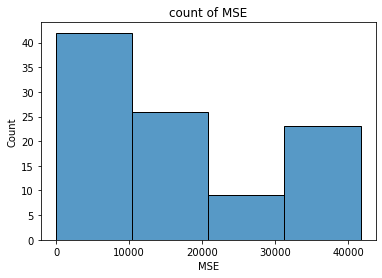

In [65]:
mse_values = []
for x in range(100):
    x = df.sample(n=2, axis='columns').values
    y = df['prp'].values
    mse_values.append(test_model(x,y))
sns.histplot(mse_values, bins=4)
plt.title('count of MSE')
plt.xlabel('MSE')

'''
MSE value differs quite a bit, anywhere from 0 to over 40K. Although, more than 40% of the runs had MSEs within 10K.
'''